# Machine Learning - DVF sans outliers

In [0]:
#!pip install pycaret

In [0]:
#!pip install pandas-profiling[notebook,html]

### Importation des librairies 

In [3]:
import pandas as pd
from pycaret.regression import *
from pandas_profiling import ProfileReport
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importation du dataset 

In [4]:
dvf=pd.read_csv("/content/drive/My Drive/data/dvf3.csv")
dvf.head()

valeur_fonciere regions  ... nature_mutation nombre_pieces_principales
0         115000.0  SudEst  ...           Vente                       0.0
1         175050.0  SudEst  ...           Vente                       5.0
2         165900.0  SudEst  ...           Vente                       4.0
3         181800.0  SudEst  ...           Vente                       0.0
4         177000.0  SudEst  ...           Vente                       0.0

[5 rows x 5 columns]

### Remarques :
 *  Ce Dataframe comporte toutes les valeurs foncières, y compris les outliers.
 *  Pour faciliter les tests des algorithmes je crée un sample de 100000 entrées. 

In [5]:
dvf_sample= dvf.sample(n=100000,random_state=42).reset_index(drop=True)
dvf_sample.shape

(100000, 5)

In [6]:
profile = ProfileReport(dvf_sample, title='DVF without Outliers Profiling Report')
profile

In [7]:
profile.to_file(output_file="dvf_without_outliers_report.html")

### Séparation du dataframe en 2

Afin de démontrer la fonction Predict_model () sur des données invisibles, un échantillon de 5000 enregistrements a été retenu de l'ensemble de données d'origine pour être utilisé pour les prévisions. Cela ne doit pas être confondu avec une séparation train / test, car cette séparation particulière est effectuée pour simuler un scénario réel. Une autre façon de penser à cela est que ces 5000 enregistrements ne sont pas disponibles au moment où l'expérience d'apprentissage automatique a été effectuée.

In [8]:
dfmodel= dvf_sample.sample(frac=0.95,random_state=42).reset_index(drop=True)
dfhide=dvf_sample.drop(dfmodel.index).reset_index(drop=True)
print("Shape du dfmodel: "+ str(dfmodel.shape))
print("Shape du dfhide: "+ str(dfhide.shape))

Shape du dfmodel: (95000, 5)
Shape du dfhide: (5000, 5)


### Configuration du dataset

La fonction setup () initialise l'environnement dans pycaret et crée le pipeline de transformation pour préparer les données pour la modélisation et le déploiement. setup () doit être appelé avant d'exécuter toute autre fonction dans pycaret. Il prend deux paramètres obligatoires: une trame de données pandas et le nom de la colonne cible. Tous les autres paramètres sont facultatifs et sont utilisés pour personnaliser le pipeline de prétraitement.

1.   Data Scale
2.   Target transformation

In [9]:
data=setup(data=dfmodel, target='valeur_fonciere', session_id=42, normalize = True, transformation = True, transform_target = True)

 
Setup Succesfully Completed!


### Comparaison des différents algorithmes de régression

La fonction forme tous les modèles de la bibliothèque de modèles et les note à l'aide de la validation croisée kfold pour l'évaluation métrique. La sortie imprime une grille de score qui montre la moyenne des MAE, MSE, RMSE, R2, RMSLE et MAPE à travers les plis (10 par défaut) de tous les modèles disponibles dans la bibliothèque de modèles.

In [10]:
compare_models()

IntProgress(value=0, description='Processing: ', max=245)

Initiated  . . . . . . . . . . . . . . . . . .                         11:48:34
Status     . . . . . . . . . . . . . . . . . .             Fitting Fold 1 of 10
Estimator  . . . . . . . . . . . . . . . . . .  Light Gradient Boosting Machine
ETC        . . . . . . . . . . . . . . . . . .                  Calculating ETC

Model         MAE  ...   RMSLE    MAPE
0    Gradient Boosting Regressor  38403.1225  ...  0.4064  0.3761
1      Extreme Gradient Boosting  38407.8223  ...  0.4064  0.3762
2                  Random Forest  38462.9589  ...  0.4072  0.3765
3          Extra Trees Regressor  38475.9857  ...  0.4073  0.3764
4                  Decision Tree  38487.7104  ...  0.4074  0.3766
5              Linear Regression  38704.8443  ...  0.4083  0.3796
6               Ridge Regression  38678.2021  ...  0.4082  0.3791
7         Least Angle Regression  38676.5059  ...  0.4082  0.3791
8                 Bayesian Ridge  38683.6252  ...  0.4083  0.3792
9                Huber Regressor  38464.7136  ...  0.4081  0.3740
10            AdaBoost Regressor  39223.7400  ...  0.4122  0.3868
11       Random Sample Consensus  38442.4037  ...  0.4095  0.3750
12        Support Vector Machine  38134.3474  ...  0.4091  0.3690
13            TheilSen Regressor  39304.0635  ...  0.4128  0.3813
14   Orthogonal Matching Pursuit  40126.0975  ...  0.4201  0.3950
15              Lasso Regression  42512.7656  ...  0.4393  0.4239
16                   Elastic Net  42512.7656  ...  0.4393  0.4239
17  Lasso Least Angle Regression  42512.7656  ...  0.4393  0.4239
18         K Neighbors Regressor  41129.5600  ...  0.4369  0.4068
19  Passive Aggressive Regressor  57577.1366  ...  0.5969  0.5817

[20 rows x 7 columns]

LightGBMError: ignored

### Création d'un modèle

Création du modèle Random Forest Regressor qui a un des meilleurs scores.

In [11]:
rf=create_model('rf', fold = 5)
rf

MAE           MSE        RMSE      R2   RMSLE    MAPE
0     39195.8664  2.187761e+09  46773.5128  0.1269  0.4159  0.3884
1     38384.9139  2.121294e+09  46057.5091  0.1181  0.4046  0.3716
2     37559.4653  2.070888e+09  45507.0089  0.1362  0.4002  0.3653
3     38428.2554  2.125681e+09  46105.1088  0.1341  0.4088  0.3813
4     38821.5041  2.188163e+09  46777.8066  0.1045  0.4085  0.3755
Mean  38478.0010  2.138758e+09  46244.1892  0.1240  0.4076  0.3764
SD      545.5589  4.455236e+07    482.1947  0.0116  0.0052  0.0080

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Tune model

Lorsqu'un modèle est créé à l'aide de la fonction create_model (), il utilise les hyperparamètres par défaut. Afin de régler les hyperparamètres, la fonction tune_model () est utilisée. Cette fonction règle automatiquement les hyperparamètres d'un modèle sur un espace de recherche prédéfini et le note à l'aide de la validation croisée kfold. La sortie imprime une grille de score qui montre MAE, MSE, RMSE, R2, RMSLE et MAPE par pli.

In [12]:
tuned_rf = tune_model('rf', fold = 5, n_iter=5)

MAE           MSE        RMSE      R2   RMSLE    MAPE
0     39185.5844  2.184312e+09  46736.6232  0.1283  0.4156  0.3886
1     38422.5362  2.120623e+09  46050.2260  0.1183  0.4043  0.3720
2     37528.5369  2.062447e+09  45414.1709  0.1397  0.3997  0.3653
3     38396.0179  2.118747e+09  46029.8491  0.1370  0.4085  0.3812
4     38741.9583  2.176263e+09  46650.4312  0.1094  0.4079  0.3752
Mean  38454.9267  2.132478e+09  46176.2601  0.1265  0.4072  0.3764
SD      543.8686  4.435603e+07    481.0293  0.0114  0.0053  0.0080

In [13]:
tuned_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Visualisation du modèle


#### Residual Plot

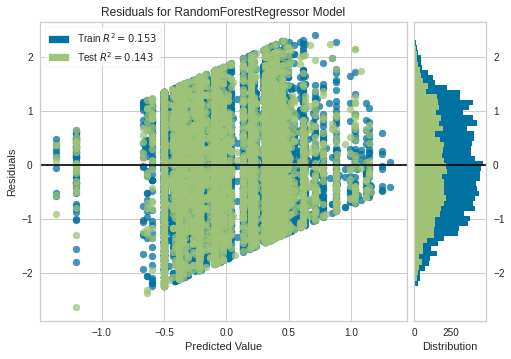

In [15]:
plot_model(tuned_rf)

#### Prediction Error Plot

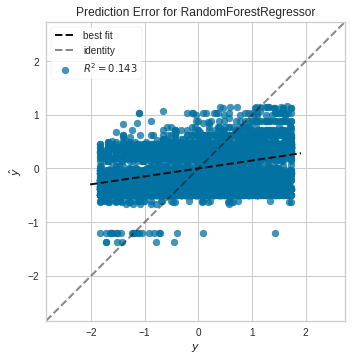

In [16]:
plot_model(tuned_rf, plot = 'error')

#### Feature Importance Plot

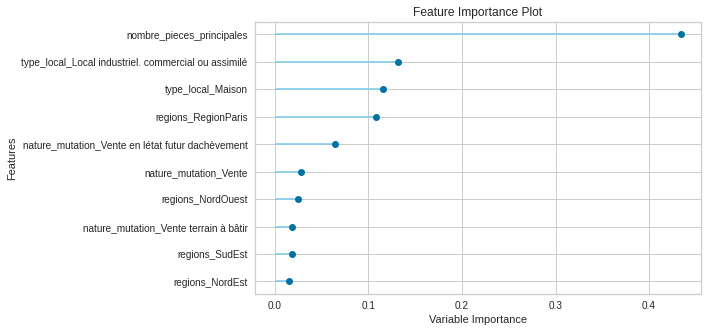

In [20]:
plot_model(tuned_rf, plot='feature')

### Prédiction sur le Test


Avant de finaliser le modèle, il est conseillé d'effectuer une dernière vérification en prédisant l'ensemble de test et en examinant les mesures d'évaluation.

In [22]:
predict_model(tuned_rf)

Model         MAE           MSE  ...     R2   RMSLE    MAPE
0  Random Forest Regressor  37537.4044  2.051819e+09  ...  0.132  0.3995  0.3662

[1 rows x 7 columns]

nombre_pieces_principales  regions_DOMTOM  ...         0        Label
0                     -1.144460             0.0  ...   95000.0   96862.9246
1                      1.233510             0.0  ...  140000.0  138620.1746
2                     -0.089584             0.0  ...  134000.0   96772.1912
3                      1.233510             0.0  ...   75000.0  137370.5824
4                     -1.144460             0.0  ...  173500.0  102325.6659
...                         ...             ...  ...       ...          ...
5696                  -1.144460             0.0  ...  153000.0   96862.9246
5697                   0.382018             0.0  ...  120000.0  119210.4876
5698                   0.819472             0.0  ...   94900.0  130527.0103
5699                   0.382018             0.0  ...   69000.0  115951.2876
5700                  -1.144460             0.0  ...   97380.0  102177.0491

[5701 rows x 16 columns]

### Finalisation du modèle

La fonction finalize_model () ajuste le modèle sur l'ensemble de données complet, y compris l'échantillon test / hold-out (30% dans ce cas). Le but de cette fonction est de former le modèle sur l'ensemble de données complet avant son déploiement en production.

In [23]:
final_rf = finalize_model(tuned_rf)
final_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [24]:
predict_model(final_rf)

Model         MAE           MSE  ...      R2  RMSLE    MAPE
0  Random Forest Regressor  37491.0161  2.041172e+09  ...  0.1366  0.399  0.3666

[1 rows x 7 columns]

nombre_pieces_principales  regions_DOMTOM  ...         0        Label
0                     -1.144460             0.0  ...   95000.0   98243.6766
1                      1.233510             0.0  ...  140000.0  141157.1585
2                     -0.089584             0.0  ...  134000.0   98481.5990
3                      1.233510             0.0  ...   75000.0  134580.4450
4                     -1.144460             0.0  ...  173500.0  102842.2269
...                         ...             ...  ...       ...          ...
5696                  -1.144460             0.0  ...  153000.0   98243.6766
5697                   0.382018             0.0  ...  120000.0  118010.0396
5698                   0.819472             0.0  ...   94900.0  128353.1504
5699                   0.382018             0.0  ...   69000.0  116400.0786
5700                  -1.144460             0.0  ...   97380.0  101929.8202

[5701 rows x 16 columns]

### Prédiction sur les données cachées


In [25]:
hide_predictions = predict_model(final_rf, data=dfhide)
hide_predictions.head()

valeur_fonciere      regions  ... nombre_pieces_principales        Label
0         163000.0       SudEst  ...                       0.0  127716.3045
1          73000.0    NordOuest  ...                       3.0  115250.3562
2         157300.0     SudOuest  ...                       0.0  118176.4116
3         209000.0      NordEst  ...                       5.0  134580.4450
4          49000.0  RegionParis  ...                       0.0  129336.0359

[5 rows x 6 columns]

### Sauvegarde du model 

In [26]:
save_model(final_rf,'FinalRF')

Transformation Pipeline and Model Succesfully Saved
